# Projet 3: Conception d'une application au service de la santé publique

## Application (idée)

### Sommaire

- <a href="#C2">Cas pratiques de l'application.</a>


## <a name="C11">Cas pratiques de l'application.</a>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  
</div>

In [ ]:
%matplotlib inline
#dataframes
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#display a photo
from urllib.request import urlopen
from PIL import Image

In [ ]:
df=pd.read_csv('en_openfoodfacts_org_products_clean.csv', engine='python')

In [ ]:
pd.options.display.max_rows=1000
pd.options.display.max_columns=25

In [ ]:
df1=df.copy()

In [ ]:
df1.shape

In [ ]:
df1.columns

In [ ]:
df1['main_category'].value_counts()

In [ ]:
df1.loc[df1[df1['main_category']!='unknown'].index, 'main_category'] = df1['main_category'].str[3:]

In [ ]:
df1['main_category']=df1['main_category'].str.replace('-', ' ')
df1['main_category'].value_counts()

In [ ]:
df1['countries_tags']

In [ ]:
df1.loc[df1[df1['countries_tags']!='unknown'].index, 'countries_tags'] = df1['countries_tags'].str[3:]
df1['countries_tags']

In [ ]:
(df1['countries_tags']=='unkown').sum()

In [ ]:
df1['pnns_groups_1'].value_counts()

In [ ]:
df1['pnns_groups_1'] = df1['pnns_groups_1'].str.lower().str.replace('-', ' ')

In [ ]:
df1['pnns_groups_1'].value_counts()

In [ ]:
df1['pnns_groups_2'].value_counts()

In [ ]:
df1['pnns_groups_2'] = df1['pnns_groups_2'].str.lower().str.replace('-', ' ')

In [ ]:
df1['product_name']

In [ ]:
df1['product_name'] = df1['product_name'].str.lower()

In [ ]:
df1['product_name']

In [ ]:
df1['brands_tags'].value_counts()

In [ ]:
df1['brands_tags'] = df1['brands_tags'].str.lower().str.replace('-', ' ')

In [ ]:
df1['brands_tags'].value_counts()

In [ ]:
df1.head()

In [ ]:
df1 = df1.rename(columns={'Unnamed: 0':'old_index'})

In [ ]:
df1['pnns_groups_2'].value_counts()

In [ ]:
df1[(df1['product_name'].str.contains('jambon blanc')) & (df1['pnns_groups_2'].str.contains('meat'))].sort_values('saturated-fat_100g')

In [427]:
def codebar_1(code='041500902449', variable='salt_100g'):

    #présentation de notre produit
    if (df1['code']==code).sum()==0:
        print('product not available or code is incorrect')
        return

    print('notre produit est:')
    print('-------''\n''-------')
    display(df1[df1['code']==code])
    ind=df1[df1['code']==code].index
    
    categ = df1.loc[ind[0],'main_category']
    links = df1.loc[ind[0],'image_small_url']
    if links!='unknown':
        img = Image.open(urlopen(links))
        display(img)
        print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[ind[0],'product_name'], df1.loc[ind[0],variable]))
    else: 
        print('pas de photo')
        print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[ind[0],'product_name'], df1.loc[ind[0],variable]))

    print('-------''\n''-------''\n''-------')

    #présenter les produit équivalents en france avec les valeurs minis de la varaible concernée

    print('les 5 produits équivalent en France, dans la catégorie {}, avec le moins de {} sont les suivants:'.format(categ,variable[:-5])) 
    print('-------''\n''-------''\n''-------')
    indexes=df1[(df1['countries_tags']=='france') & (df1['main_category']==categ)].sort_values(variable, ascending=True).head().index
    for n in indexes:
        if df1.loc[n,'image_small_url']!='unknown':
            img = Image.open(urlopen(df1.loc[n,'image_small_url']))
            display(img)
            print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[n,'product_name'], df1.loc[n,variable]))
            print('-------''\n''-------')

        else: 
            print('pas de photo')
            print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[n,'product_name'], df1.loc[n,variable]))
            print('-------''\n''-------')

            
    #dessiner une graphe qui présente les produits équivalents en fonction de variable

    plt.figure(figsize=(12,4))
    sns.barplot(x=df1.loc[indexes,variable], y=df1.loc[indexes,'product_name'], orient="h")
    plt.xticks(fontsize=14)
    plt.xlabel(variable,fontsize=14)
    plt.yticks(fontsize=14)
    plt.show

    #présenter les produit équivalents en usa avec les valeurs minis de la varaible concernée

    print('The 5 similar products in USA, within the {} category, with the lowest of {} are the followings:'.format(categ, variable[:-5])) 
    print('-------''\n''-------''\n''-------')
    indexes=df1[(df1['countries_tags']=='united-states') & (df1['main_category']==categ)].sort_values(variable, ascending=True).head().index
    for n in indexes:
        if df1.loc[n,'image_small_url']!='unknown':
            img = Image.open(urlopen(df1.loc[n,'image_small_url']))
            display(img)
            print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[n,'product_name'], df1.loc[n,variable]))
            print('-------''\n''-------')

        else: 
            print('pas de photo')
            print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[n,'product_name'], df1.loc[n,variable]))
            print('-------''\n''-------')

    
    
    return 

notre produit est:
-------
-------


,Unnamed: 0,code,created_datetime,product_name,brands_tags,countries_tags,pnns_groups_1,pnns_groups_2,main_category,image_small_url,fiber_100g,fruits_vegetables_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
862708,1064934,3596710347247,2016-10-28T15:56:34Z,tomates pelées,auchan,france,fruits and vegetables,vegetables,peeled tomatoes,https://images.openfoodfacts.org/images/produc...,0.8,46.705167,88.0,0.1,0.0,3.9,3.9,0.8,0.05,0.02


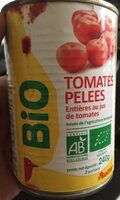

le "carbohydrates" de __tomates pelées__ est de 3.9 g pour 100g
-------
-------
-------
les 5 produits équivalent en France, dans la catégorie peeled tomatoes, avec le moins de carbohydrates sont les suivants:
-------
-------
-------


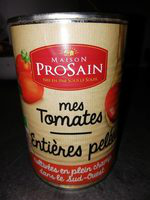

le "carbohydrates" de __tomates entières pelées__ est de 1.9 g pour 100g
-------
-------


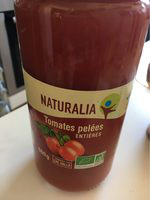

le "carbohydrates" de __tomates pelees__ est de 1.9 g pour 100g
-------
-------


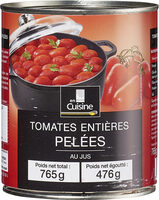

le "carbohydrates" de __tomates entières pelées au jus__ est de 1.9 g pour 100g
-------
-------


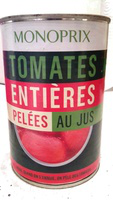

le "carbohydrates" de __tomates entières pelées au jus__ est de 2.1 g pour 100g
-------
-------


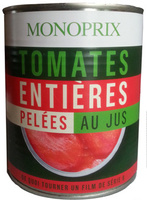

le "carbohydrates" de __tomates entières pelées au jus__ est de 2.1 g pour 100g
-------
-------
The 5 similar products in USA, within the peeled tomatoes category, with the lowest of carbohydrates are the followings:
-------
-------
-------


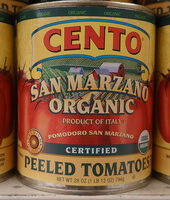

le "carbohydrates" de __san marzano organic certified peeled tomatoes__ est de 5.22 g pour 100g
-------
-------


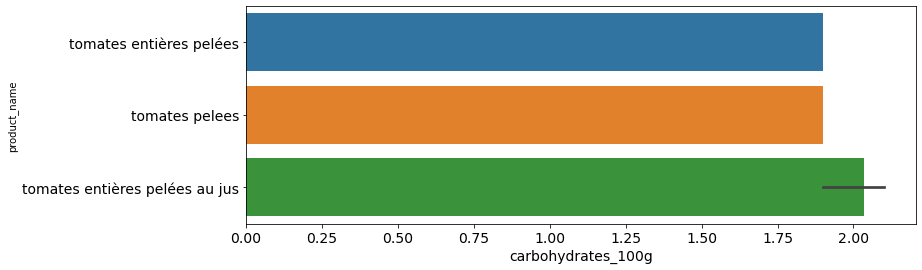

In [431]:
codebar_1('3596710347247', 'carbohydrates_100g')

In [429]:
codebar_1('358028121543', 'carbohydrates_100g')

product not available or code is incorrect


notre produit est:
-------
-------


,Unnamed: 0,code,created_datetime,product_name,brands_tags,countries_tags,pnns_groups_1,pnns_groups_2,main_category,image_small_url,fiber_100g,fruits_vegetables_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
868744,1071384,3596710482900,2020-10-07T09:47:17Z,crème légère 18% semi-épaisse,auchan,france,milk and dairy products,milk and yogurt,cremes legeres,https://images.openfoodfacts.org/images/produc...,0.186957,0.0,808.0,18.0,11.0,5.0,3.1,2.8,0.14,0.056


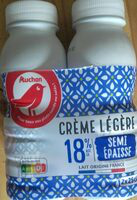

le "fat" de __crème légère 18% semi-épaisse__ est de 18.0 g pour 100g
-------
-------
-------
les 5 produits équivalent en France, dans la catégorie cremes legeres, avec le moins de fat sont les suivants:
-------
-------
-------


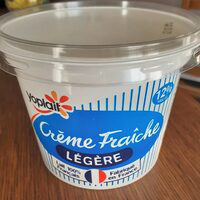

le "fat" de __crème fraîche légère.__ est de 1.8 g pour 100g
-------
-------


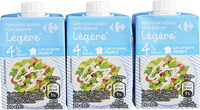

le "fat" de __légère semi - épaisse__ est de 4.0 g pour 100g
-------
-------


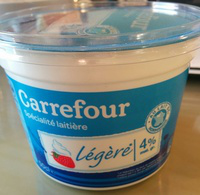

le "fat" de __spécialité laitière légère__ est de 4.0 g pour 100g
-------
-------


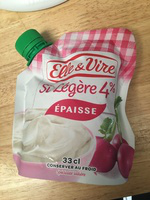

le "fat" de __si légère 4%__ est de 4.0 g pour 100g
-------
-------


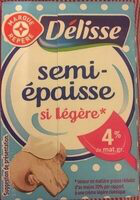

le "fat" de __crème uht semi-épaisse 4% mat. gr.__ est de 4.0 g pour 100g
-------
-------
The 5 similar products in USA, within the cremes legeres category, with the lowest of fat are the followings:
-------
-------
-------


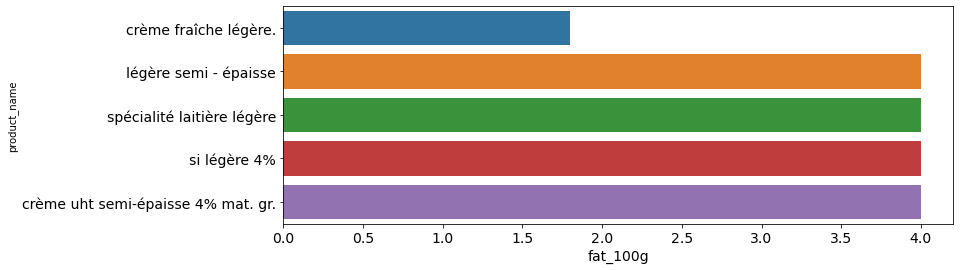

In [430]:
codebar_1('3596710482900', 'fat_100g')

notre produit est:
-------
-------


,Unnamed: 0,code,created_datetime,product_name,brands_tags,countries_tags,pnns_groups_1,pnns_groups_2,main_category,image_small_url,fiber_100g,fruits_vegetables_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
761407,932762,3330720237613,2017-06-05T08:35:10Z,pate a tartiner noisette lot&garonne et cacao,lucien georgelin,france,sugary snacks,sweets,cocoa and hazelnuts spreads,unknown,4.080576,0.0,2272.0,33.0,13.1,53.0,49.0,8.0,0.11,0.044


pas de photo
le "sugars" de __pate a tartiner noisette lot&garonne et cacao__ est de 49.0 g pour 100g
-------
-------
-------
les 5 produits équivalent en France, dans la catégorie cocoa and hazelnuts spreads, avec le moins de sugars sont les suivants:
-------
-------
-------


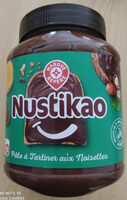

le "sugars" de __pâte à tartiner__ est de 0.0 g pour 100g
-------
-------


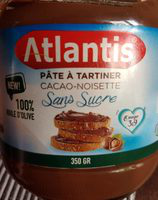

le "sugars" de __pâte à tartiner cacao-noisette sans sucre__ est de 0.0 g pour 100g
-------
-------


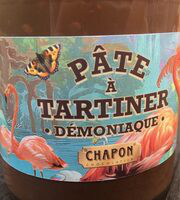

le "sugars" de __pâte a tartiner démoniaque__ est de 0.1 g pour 100g
-------
-------


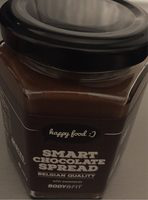

le "sugars" de __smart chocolate spread__ est de 0.9 g pour 100g
-------
-------


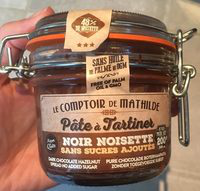

le "sugars" de __pate à tartiner__ est de 1.3 g pour 100g
-------
-------
The 5 similar products in USA, within the cocoa and hazelnuts spreads category, with the lowest of sugars are the followings:
-------
-------
-------


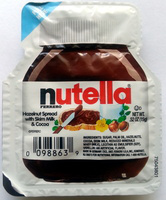

le "sugars" de __nutella, hazelnut spread with cocoa, hazelnut__ est de 13.145587939636236 g pour 100g
-------
-------


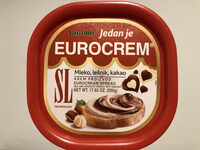

le "sugars" de __eurocream spread__ est de 51.0 g pour 100g
-------
-------
pas de photo
le "sugars" de __rigoni di asiago, nocciolata organic hazelnut spread with cocoa & milk__ est de 52.94 g pour 100g
-------
-------
pas de photo
le "sugars" de __rigoni di asiago, nocciolata, organic hazelnut spread with cocoa & milk__ est de 52.94 g pour 100g
-------
-------


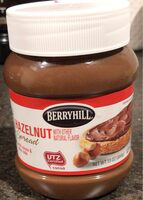

le "sugars" de __hazelnut spread__ est de 54.054054054054 g pour 100g
-------
-------


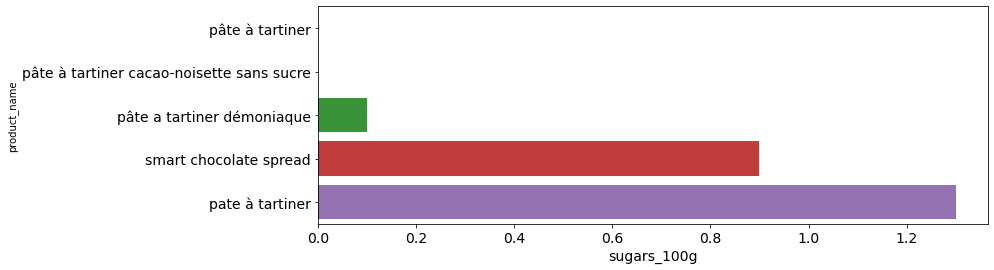

In [432]:
codebar_1('3330720237613', 'sugars_100g')

notre produit est:
-------
-------


,Unnamed: 0,code,created_datetime,product_name,brands_tags,countries_tags,pnns_groups_1,pnns_groups_2,main_category,image_small_url,fiber_100g,fruits_vegetables_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
712758,873621,3263670730012,2015-04-18T15:28:38Z,saumon sauvage au naturel,connetable,france,fish meat eggs,fish and seafood,saumons au naturel,https://images.openfoodfacts.org/images/produc...,0.0,0.0,456.0,1.9,0.6,0.0,0.0,23.0,1.0,0.4


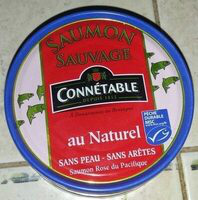

le "salt" de __saumon sauvage au naturel__ est de 1.0 g pour 100g
-------
-------
-------
les 5 produits équivalent en France, dans la catégorie saumons au naturel, avec le moins de salt sont les suivants:
-------
-------
-------


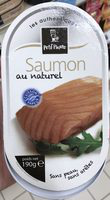

le "salt" de __saumon au naturel__ est de 0.76 g pour 100g
-------
-------


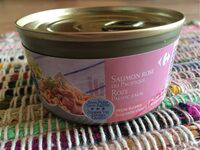

le "salt" de __saumon rose du pacifique sans peau__ est de 0.98000001907349 g pour 100g
-------
-------


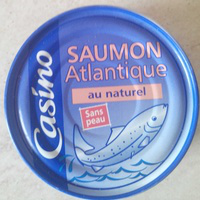

le "salt" de __saumon atlantique au naturel sans peau__ est de 1.0 g pour 100g
-------
-------


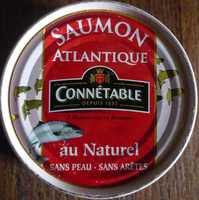

le "salt" de __saumon atlantique au naturel sans peau sans arêtes__ est de 1.0 g pour 100g
-------
-------


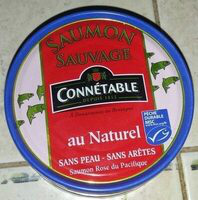

le "salt" de __saumon sauvage au naturel__ est de 1.0 g pour 100g
-------
-------
The 5 similar products in USA, within the saumons au naturel category, with the lowest of salt are the followings:
-------
-------
-------


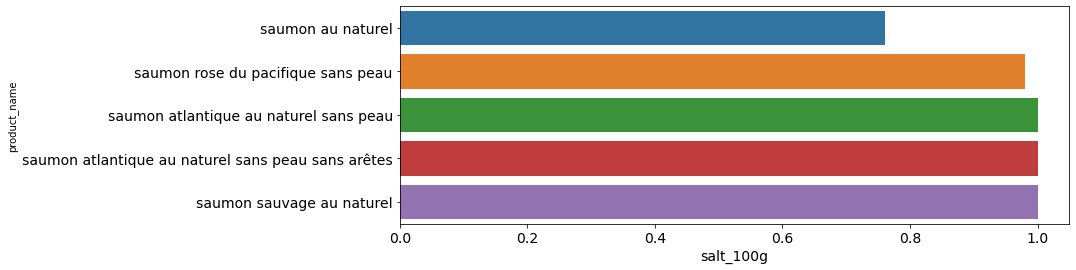

In [433]:
codebar_1('3263670730012','salt_100g')

In [434]:
codebar_1('7622210450098','saturated-fat_100g')

product not available or code is incorrect


In [435]:
codebar_1('3038359004544','salt_100g')

product not available or code is incorrect


notre produit est:
-------
-------


,Unnamed: 0,code,created_datetime,product_name,brands_tags,countries_tags,pnns_groups_1,pnns_groups_2,main_category,image_small_url,fiber_100g,fruits_vegetables_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
632802,774375,3038359001741,2015-01-17T14:10:52Z,taureau aile riz parfume 1kg,taureau aile,france,cereals and potatoes,cereals,mixed rices,https://images.openfoodfacts.org/images/produc...,0.4,0.0,1483.0,0.7,0.2,78.0,0.2,7.5,0.02,0.008


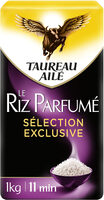

le "carbohydrates" de __taureau aile riz parfume 1kg__ est de 78.0 g pour 100g
-------
-------
-------
les 5 produits équivalent en France, dans la catégorie mixed rices, avec le moins de carbohydrates sont les suivants:
-------
-------
-------


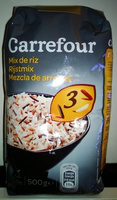

le "carbohydrates" de __mix de riz__ est de 28.19277676343603 g pour 100g
-------
-------


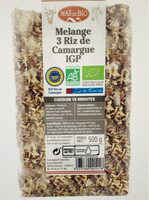

le "carbohydrates" de __mélange de 3 riz complets biologiques__ est de 28.19277676343603 g pour 100g
-------
-------


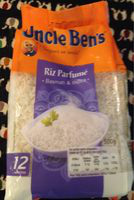

le "carbohydrates" de __riz parfumé basmati & indica__ est de 29.1 g pour 100g
-------
-------


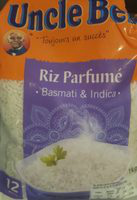

le "carbohydrates" de __riz parfumé basmati et indica__ est de 29.1 g pour 100g
-------
-------


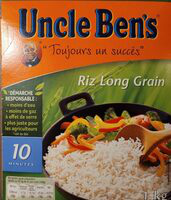

le "carbohydrates" de __riz long en grain__ est de 34.0 g pour 100g
-------
-------
The 5 similar products in USA, within the mixed rices category, with the lowest of carbohydrates are the followings:
-------
-------
-------


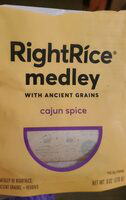

le "carbohydrates" de __right rice medley__ est de 66.0 g pour 100g
-------
-------


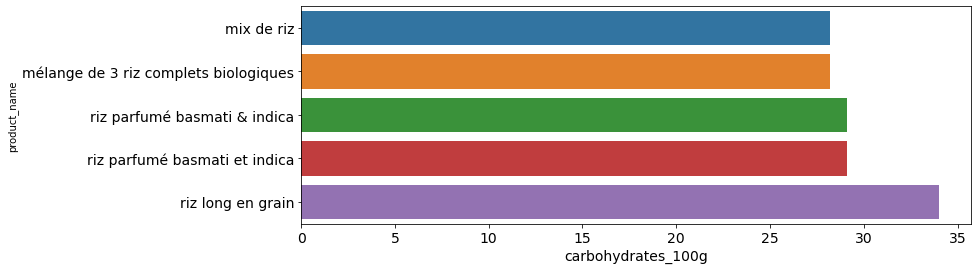

In [437]:
codebar_1('3038359001741','carbohydrates_100g')

notre produit est:
-------
-------


,Unnamed: 0,code,created_datetime,product_name,brands_tags,countries_tags,pnns_groups_1,pnns_groups_2,main_category,image_small_url,fiber_100g,fruits_vegetables_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
864964,1067344,3596710418275,2016-11-04T20:39:59Z,"légumes secs épeautre, orge","auchan,auchan bio",france,cereals and potatoes,cereals,spelts,https://images.openfoodfacts.org/images/produc...,9.2,0.0,1443.0,1.9,0.3,60.0,1.1,17.3,0.05,0.02


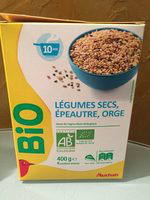

le "saturated-fat" de __légumes secs épeautre, orge__ est de 0.3 g pour 100g
-------
-------
-------
les 5 produits équivalent en France, dans la catégorie spelts, avec le moins de saturated-fat sont les suivants:
-------
-------
-------


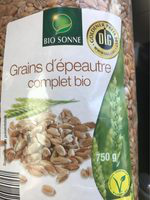

le "saturated-fat" de __grains d epautre complet bio__ est de 0.20000000298023 g pour 100g
-------
-------


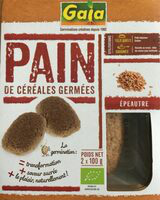

le "saturated-fat" de __2 x 100g pain essene epeautre__ est de 0.26 g pour 100g
-------
-------


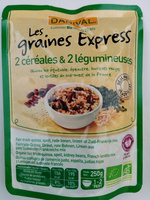

le "saturated-fat" de __les graines express 2 céréales & légumineuses__ est de 0.3 g pour 100g
-------
-------


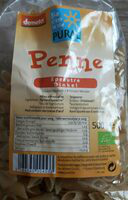

le "saturated-fat" de __epeautre__ est de 0.3 g pour 100g
-------
-------


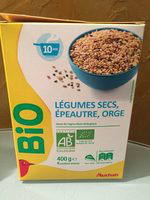

le "saturated-fat" de __légumes secs épeautre, orge__ est de 0.3 g pour 100g
-------
-------
The 5 similar products in USA, within the spelts category, with the lowest of saturated-fat are the followings:
-------
-------
-------


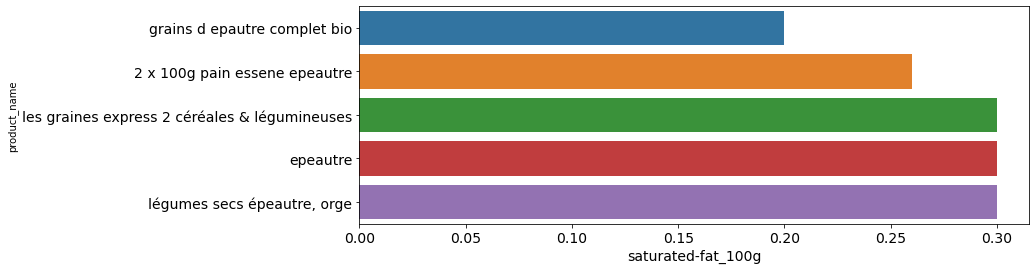

In [438]:
codebar_1('3596710418275','saturated-fat_100g')

notre produit est:
-------
-------


,Unnamed: 0,code,created_datetime,product_name,brands_tags,countries_tags,pnns_groups_1,pnns_groups_2,main_category,image_small_url,fiber_100g,fruits_vegetables_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
624495,764003,3017760002035,2012-10-26T18:44:33Z,petit écolier chocolat fin,lu,france,sugary snacks,biscuits and cakes,butter biscuit with chocolate,https://images.openfoodfacts.org/images/produc...,4.1,0.0,2100.0,25.0,16.0,61.0,36.0,6.4,0.6,0.24


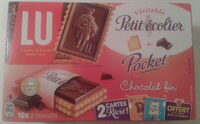

le "saturated-fat" de __petit écolier chocolat fin__ est de 16.0 g pour 100g
-------
-------
-------
les 5 produits équivalent en France, dans la catégorie butter biscuit with chocolate, avec le moins de saturated-fat sont les suivants:
-------
-------
-------


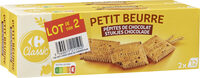

le "saturated-fat" de __petit beurre aux pépites de chocolat__ est de 9.9 g pour 100g
-------
-------


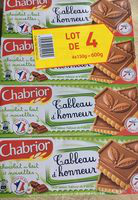

le "saturated-fat" de __tableau d'honneur__ est de 12.9 g pour 100g
-------
-------


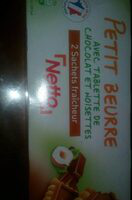

le "saturated-fat" de __petit beurre tablette chocolat noisettes__ est de 12.9 g pour 100g
-------
-------


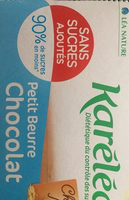

le "saturated-fat" de __petit beurre chocolat__ est de 13.0 g pour 100g
-------
-------


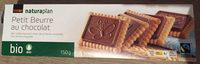

le "saturated-fat" de __petit beurre au chocolat__ est de 14.0 g pour 100g
-------
-------
The 5 similar products in USA, within the butter biscuit with chocolate category, with the lowest of saturated-fat are the followings:
-------
-------
-------


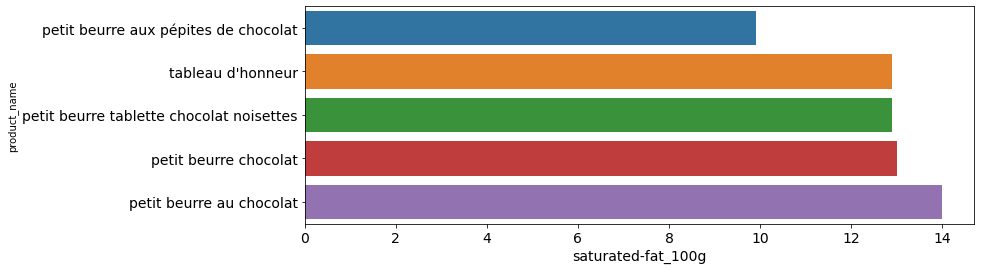

In [439]:
codebar_1('3017760002035','saturated-fat_100g')

In [ ]:
def codebar(code='3263670434484', variable='salt_100g'):

    #présentation de notre produit
    if (df1['code']==code).sum()==0:
        print('product not available or code is incorrect')
        return

    print('notre produit est:')
    print('-------''\n''-------')
    display(df1[df1['code']==code])
    ind=df1[df1['code']==code].index
    
    categ = df1.loc[ind[0],'main_category']
    links = df1.loc[ind[0],'image_small_url']
    if links!='unknown':
        img = Image.open(urlopen(links))
        display(img)
        print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[ind[0],'product_name'], df1.loc[ind[0],variable]))
    else: 
        print('pas de photo')
        print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[ind[0],'product_name'], df1.loc[ind[0],variable]))

    print('-------''\n''-------''\n''-------')
    #présenter les produit équivalents en france avec les valeurs minis de la varaible concernée

    print('les 5 produits équivalent en France, dans la catégorie {}, avec moins de {} sont les suivants:'.format(categ,variable[:-5])) 
    print('-------''\n''-------''\n''-------')
    indexes=df1[(df1['countries_tags']=='france') & (df1['main_category']==categ)].sort_values(variable, ascending=True).head().index
    for n in indexes:
        if df1.loc[n,'image_small_url']!='unknown':
            img = Image.open(urlopen(df1.loc[n,'image_small_url']))
            display(img)
            print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[n,'product_name'], df1.loc[n,variable]))
            print('-------''\n''-------')

        else: 
            print('pas de photo')
            print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[n,'product_name'], df1.loc[n,variable]))
            print('-------''\n''-------')

    #dessiner une graphe qui présente les produits équivalents en fonction de variable

    plt.figure(figsize=(9,5))
    sns.barplot(x=df1.loc[indexes,variable], y=df1.loc[indexes,'product_name'], orient="h")
    plt.xticks(fontsize=14)
    plt.xlabel(variable,fontsize=14)
    plt.yticks(fontsize=14)
    plt.show
    
    
    return df1[(df1['countries_tags']=='france') & (df1['main_category']==categ)].sort_values(variable, ascending=True).head()
    

In [ ]:
def product_collect_f(product='jambon blanc', group='processed meat', variable='energy_100g'):
    
    l=df1[(df1['product_name'].str.contains(product)) & (df1['countries_tags']=='france')
        & (df1['pnns_groups_2']==group)].sort_values(variable, ascending=False).head().index
    
    for n in l:
        if df1.loc[n,'image_small_url']!='unknown':
            img = Image.open(urlopen(df1.loc[n,'image_small_url']))
            display(img)
            print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[n,'product_name'], df1.loc[n,variable]))
        else: 
            print('pas de photo')
            print('le "{}" de __{}__ est de {} g pour 100g'.format(variable[:-5], df1.loc[n,'product_name'], df1.loc[n,variable]))

    plt.figure(figsize=(12,5))
    sns.barplot(x=df1.loc[l,variable], y=df1.loc[l,'product_name'], orient="h")
    plt.xticks(fontsize=14)
    plt.xlabel(variable,fontsize=14)
    plt.yticks(fontsize=14)
    plt.show
    
    return #df1[(df1['product_name'].str.contains(product)) & (df1['countries_tags']=='france')
        #& (df1['pnns_groups_2']==group)].sort_values(variable, ascending=False).head()

In [ ]:
product_collect_f('yaourt','milk and yogurt','fat_100g')

In [ ]:
product_collect_f('thon','fish and seafood','salt_100g')

# Fin